# Selenium 사용하기
셀레니움으로 스크래핑하면 너무 느리므로, 동적 웹페이지 접속 및 이벤트 발생 역할만하고, 파싱은 BS4를 쓰는게 좋다

In [2]:
!pip install selenium

  Obtaining dependency information for selenium from https://files.pythonhosted.org/packages/dc/72/96b5afa16908f9abc7c24b70adfd3a46c9740eb728ddfeab28379e38eaf9/selenium-4.16.0-py3-none-any.whl.metadata
  Obtaining dependency information for trio~=0.17 from https://files.pythonhosted.org/packages/39/46/620fbe56f41fa3ccdda2136d947fb9bacce3d1eb163f057f0262a0ddf5e0/trio-0.23.1-py3-none-any.whl.metadata
  Obtaining dependency information for trio-websocket~=0.9 from https://files.pythonhosted.org/packages/48/be/a9ae5f50cad5b6f85bd2574c2c923730098530096e170c1ce7452394d7aa/trio_websocket-0.11.1-py3-none-any.whl.metadata
  Obtaining dependency information for outcome from https://files.pythonhosted.org/packages/55/8b/5ab7257531a5d830fc8000c476e63c935488d74609b50f9384a643ec0a62/outcome-1.3.0.post0-py2.py3-none-any.whl.metadata
  Using cached sniffio-1.3.0-py3-none-any.whl (10 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 39.1 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
import time

options = Options() # 웹브라우저 설정값을 핸들링하기위해서 
options.add_experimental_option("detach", True) # 특정 함수 안에서 드라이버 생성시, 함수 종료될 때 브라우저 같이 종료되는 문제 대응

## 브라우저 실행 및 페이지 접속
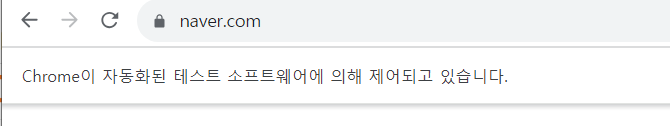

In [4]:
url = 'http://naver.com'
driver = webdriver.Chrome(options=options) # 객체 생성
driver.get(url) # 실행
time.sleep(2)

## 상호작용

In [5]:
driver.back()

In [6]:
driver.forward()

In [7]:
driver.refresh() # 새로고침

## 페이지 정보 가져오기

In [8]:
title = driver.title
url = driver.current_url
handle = driver.current_window_handle # 브라우저를 운영하는 id
print(title, url, handle)

NAVER https://www.naver.com/ 4A91FF2DCA6131F3449FDF8AC458952A


## html 요소 찾기
네이버 검색창을 핸들링해보자  
> <input id="query" name="query" type="search" title="검색어를 입력해 주세요." > placeholder="검색어를 입력해 주세요." maxlength="255" autocomplete="off" 
> class="search_input" data-atcmp-element="">

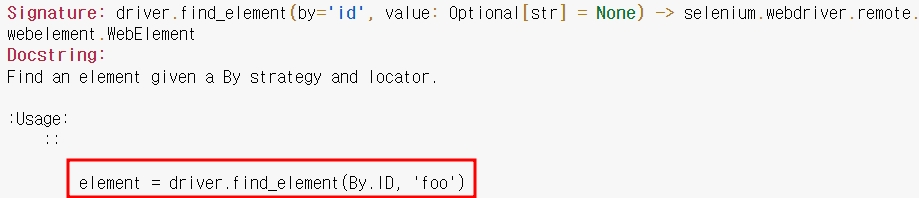

In [9]:
driver.find_element?

In [10]:
driver.find_element(By.ID, "query") # 검색창

<selenium.webdriver.remote.webelement.WebElement (session="7e93473334e3bef08c195897b32947e7", element="1F2B83E3311AB4C2F2E4783AC7A96C06_element_95")>

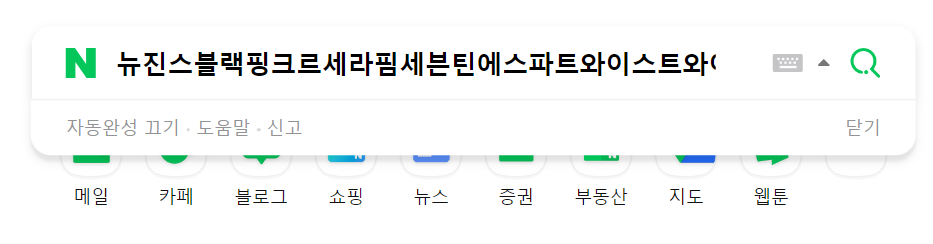

In [11]:
# 키입력
driver.find_element(By.ID, "query").send_keys('뉴진스')

In [12]:
driver.find_element(By.CLASS_NAME, "search_input").send_keys('블랙핑크')

In [13]:
driver.find_element(By.NAME, 'query').send_keys('르세라핌')

In [14]:
driver.find_element(By.CSS_SELECTOR, ".search_input").send_keys('세븐틴')

In [15]:
driver.find_element(By.CSS_SELECTOR, "#query").send_keys('에스파')

In [16]:
driver.find_element(By.CSS_SELECTOR, "[title='검색어를 입력해 주세요.']").send_keys("트와이스")

In [17]:
driver.find_element(By.CSS_SELECTOR, "[placeholder='검색어를 입력해 주세요.']").send_keys("트와이스")

In [19]:
driver.find_element(By.XPATH,"//*[@id='query']").send_keys('BTS')

## 클릭

In [20]:
# 특정 텍스트를 가지고 있는 링크를 실행
driver.find_element(By.LINK_TEXT, '쇼핑')

<selenium.webdriver.remote.webelement.WebElement (session="7e93473334e3bef08c195897b32947e7", element="1F2B83E3311AB4C2F2E4783AC7A96C06_element_189")>

In [21]:
driver.find_element(By.LINK_TEXT, '쇼핑').click()

In [22]:
# 일부 매칭
driver.find_element(By.PARTIAL_LINK_TEXT, '쇼').click()

In [23]:
# 태그는 너무 요소가 많으므로, 정확하게 대상을 찾을 때에는 안씀
driver.find_element(By.TAG_NAME, 'div')

<selenium.webdriver.remote.webelement.WebElement (session="7e93473334e3bef08c195897b32947e7", element="1F2B83E3311AB4C2F2E4783AC7A96C06_element_279")>

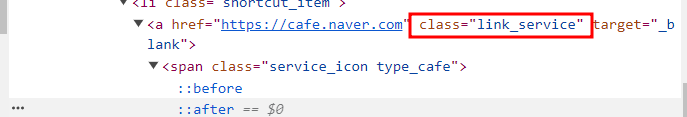

In [26]:
# 여러 개의 요소를 찾을 때
links = driver.find_elements(By.CSS_SELECTOR, '.link_service')
links

[<selenium.webdriver.remote.webelement.WebElement (session="7e93473334e3bef08c195897b32947e7", element="1F2B83E3311AB4C2F2E4783AC7A96C06_element_180")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7e93473334e3bef08c195897b32947e7", element="1F2B83E3311AB4C2F2E4783AC7A96C06_element_183")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7e93473334e3bef08c195897b32947e7", element="1F2B83E3311AB4C2F2E4783AC7A96C06_element_186")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7e93473334e3bef08c195897b32947e7", element="1F2B83E3311AB4C2F2E4783AC7A96C06_element_189")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7e93473334e3bef08c195897b32947e7", element="1F2B83E3311AB4C2F2E4783AC7A96C06_element_192")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7e93473334e3bef08c195897b32947e7", element="1F2B83E3311AB4C2F2E4783AC7A96C06_element_195")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7e93473334e3bef08c1958

In [27]:
for link in links:
    print(link)

<selenium.webdriver.remote.webelement.WebElement (session="7e93473334e3bef08c195897b32947e7", element="1F2B83E3311AB4C2F2E4783AC7A96C06_element_180")>
<selenium.webdriver.remote.webelement.WebElement (session="7e93473334e3bef08c195897b32947e7", element="1F2B83E3311AB4C2F2E4783AC7A96C06_element_183")>
<selenium.webdriver.remote.webelement.WebElement (session="7e93473334e3bef08c195897b32947e7", element="1F2B83E3311AB4C2F2E4783AC7A96C06_element_186")>
<selenium.webdriver.remote.webelement.WebElement (session="7e93473334e3bef08c195897b32947e7", element="1F2B83E3311AB4C2F2E4783AC7A96C06_element_189")>
<selenium.webdriver.remote.webelement.WebElement (session="7e93473334e3bef08c195897b32947e7", element="1F2B83E3311AB4C2F2E4783AC7A96C06_element_192")>
<selenium.webdriver.remote.webelement.WebElement (session="7e93473334e3bef08c195897b32947e7", element="1F2B83E3311AB4C2F2E4783AC7A96C06_element_195")>
<selenium.webdriver.remote.webelement.WebElement (session="7e93473334e3bef08c195897b32947e7", 

In [28]:
# 해당 클래스가 속한 요소의 자식 html을 출력
for link in links:
    print(link.get_attribute("outerHTML"))

<a href="https://mail.naver.com" class="link_service" target="_blank"><span class="service_icon type_mail"></span><span class="service_name">메일</span></a>
<a href="https://cafe.naver.com" class="link_service" target="_blank"><span class="service_icon type_cafe"></span><span class="service_name">카페</span></a>
<a href="https://blog.naver.com" class="link_service" target="_blank"><span class="service_icon type_blog"></span><span class="service_name">블로그</span></a>
<a href="https://shopping.naver.com/home" class="link_service" target="_blank"><span class="service_icon type_shopping"></span><span class="service_name">쇼핑</span></a>
<a href="https://news.naver.com/" class="link_service" target="_blank"><span class="service_icon type_news"></span><span class="service_name">뉴스</span></a>
<a href="https://finance.naver.com/" class="link_service" target="_blank"><span class="service_icon type_stock"></span><span class="service_name">증권</span></a>
<a href="https://land.naver.com/" class="link_serv

## 자동 로그인 연습

In [47]:
url = 'file:///C:/workspace/Git/WASSUP/Data_scraping/sample/signin.html'
driver = webdriver.Chrome(options=options)
driver.get(url)

In [31]:
username = driver.find_element(By.NAME, "username")
username.send_keys('hello')

In [32]:
password = driver.find_element(By.NAME, "password")
password.send_keys('1004')

In [37]:
driver.find_element(By.XPATH, '//*[@id="loginForm"]/input[3]').click()

In [38]:
driver.find_element(By.CSS_SELECTOR, "[value='Login']").click()

In [39]:
driver.back()

In [46]:
# 입력창 clear 하기
# 세션끊기면 다시 접근해야함
username = driver.find_element(By.NAME, "username")
username.clear()

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":"[name="username"]"}
  (Session info: chrome=119.0.6045.200); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x00007FF642FD82B2+55298]
	(No symbol) [0x00007FF642F45E02]
	(No symbol) [0x00007FF642E005AB]
	(No symbol) [0x00007FF642E4175C]
	(No symbol) [0x00007FF642E418DC]
	(No symbol) [0x00007FF642E7CBC7]
	(No symbol) [0x00007FF642E620EF]
	(No symbol) [0x00007FF642E7AAA4]
	(No symbol) [0x00007FF642E61E83]
	(No symbol) [0x00007FF642E3670A]
	(No symbol) [0x00007FF642E37964]
	GetHandleVerifier [0x00007FF643350AAB+3694587]
	GetHandleVerifier [0x00007FF6433A728E+4048862]
	GetHandleVerifier [0x00007FF64339F173+4015811]
	GetHandleVerifier [0x00007FF6430747D6+695590]
	(No symbol) [0x00007FF642F50CE8]
	(No symbol) [0x00007FF642F4CF34]
	(No symbol) [0x00007FF642F4D062]
	(No symbol) [0x00007FF642F3D3A3]
	BaseThreadInitThunk [0x00007FFAFB3C7344+20]
	RtlUserThreadStart [0x00007FFAFC7E26B1+33]


In [41]:
username.submit()

In [48]:
driver.find_element(By.TAG_NAME, 'p').text

'Are you sure you want to do this?'

In [49]:
# html 소스 가져오기
driver.page_source

'<html><head></head><body>\n        <h1> Sign In </h1>\n        <form action="moved.html" id="loginForm">\n            ID : <input name="username" type="text"> <br>\n            Password : <input name="password" type="password"> <br>\n\n            <input name="continue" type="submit" value="Login">\n            <input name="continue" type="button" value="Clear">\n        \n        </form>\n\n        <p>Are you sure you want to do this?</p>\n        <a href="continue.html">Continue</a>\n        <a href="cancel.html">Cancel</a>\n\n        <h1>Welcome</h1>\n        <p>Site content goes here.</p>\n        <p class="content">Site content goes here.</p>\n    \n</body></html>'

In [50]:
driver.close()

## options
options.add_argument("--headless=new") # UI없이 실행   
options.add_argument('--window-size= x, y') #실행되는 브라우저 크기를 지정할 수 있습니다.   
options.add_argument('--start-maximized') #브라우저가 최대화된 상태로 실행됩니다.   
options.add_argument('--start-fullscreen') #브라우저가 풀스크린 모드(F11)로 실행됩니다.   
options.add_argument('--blink-settings=imagesEnabled=false') #브라우저에서 이미지 로딩을 하지 않습니다.   
options.add_argument('--mute-audio') #브라우저에 음소거 옵션을 적용합니다.   
options.add_argument('incognito') #시크릿 모드의 브라우저가 실행됩니다.   

In [51]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
import time

options = Options()
options.add_argument("--headless=new") # UI 없이 움직임
options.add_experimental_option("detach", True) #특정함수안에서  드라이버 생성시 함수종료될 때 브라우저 같이 종료되는 문제 대응

In [52]:
url = 'http://naver.com'
driver = webdriver.Chrome(options=options)
driver.get(url)
time.sleep(2)

In [53]:
print(driver.title)

NAVER


In [54]:
driver.quit()
# quit과 close의 차이: quit은 탭 종료, close는 브라우저 종료

## 윈도우 컨트롤

In [55]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
import time

options = Options()
# options.add_argument("--start-maximized")
# options.add_argument("--headless=new") 
options.add_experimental_option("detach", True) #

url = 'http://naver.com'
driver = webdriver.Chrome(options=options)
driver.get(url)
time.sleep(2)

### 창의 너비/높이 구하기

In [57]:
size = driver.get_window_size()
width = size.get("width")
height = size.get("height")

print(str(width)+"px"+" "+str(height)+"px")

1051px 806px


### 창 크기 조절

In [58]:
driver.set_window_size(800, 600)

### 스크린 상에서의 창 좌표
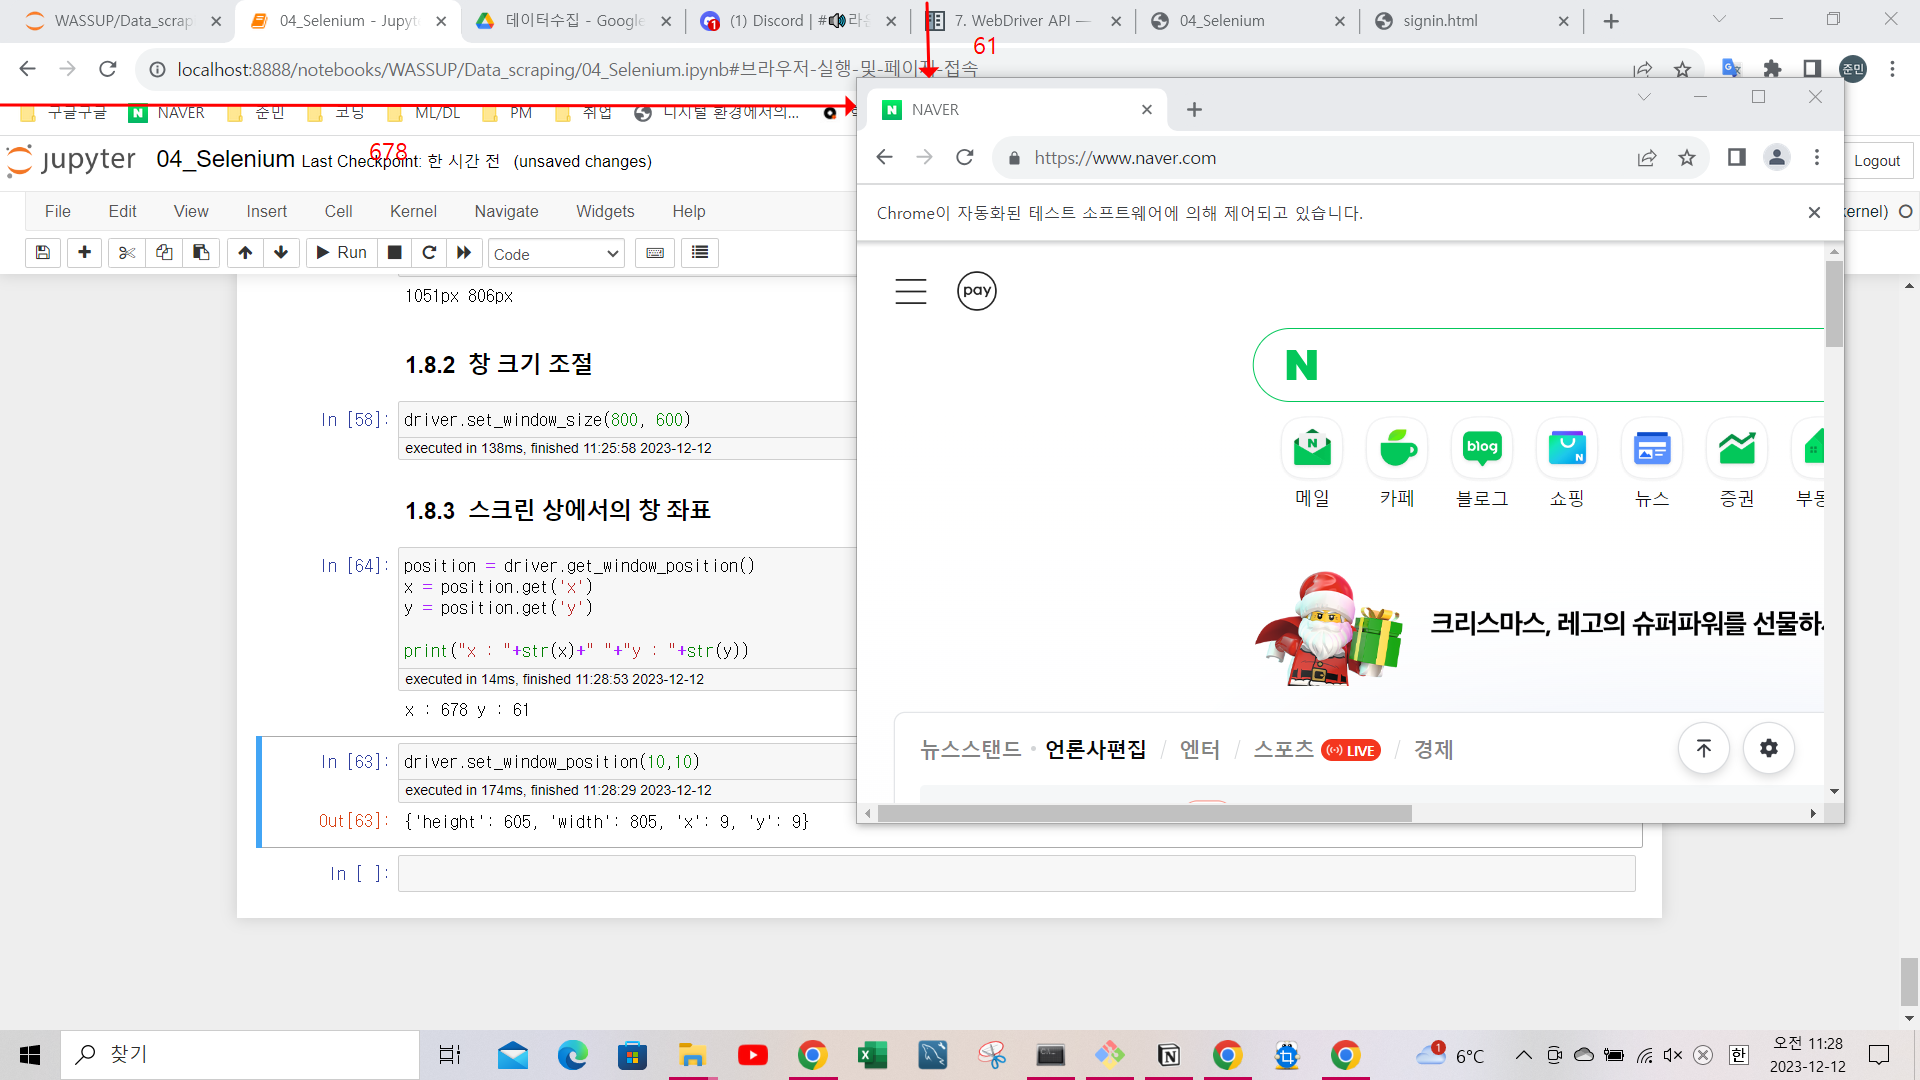

In [64]:
position = driver.get_window_position()
x = position.get('x')
y = position.get('y')

print("x : "+str(x)+" "+"y : "+str(y))

x : 678 y : 61


In [63]:
driver.set_window_position(10,10)

{'height': 605, 'width': 805, 'x': 9, 'y': 9}

In [65]:
# 창 크기 최대화
driver.maximize_window()

In [66]:
# 창 크기 최소화
driver.minimize_window()

In [68]:
# 스크린 샷
driver.save_screenshot('./image.png')


True

In [69]:
driver.close()

# 예제) 네이버 블로그

In [72]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
import time, random, pandas as pd

options = Options()
options.add_argument('--window-size=974,1047')
options.add_argument('--window-position=953,0')
options.add_experimental_option("detach", True)

In [73]:
# 웹드라이버 로드
driver = webdriver.Chrome(options = options)

In [74]:
# 조건 설정
where = 'blog'
query = '인공지능'
dateform = '20221020to20231020'
url = f'https://search.naver.com/search.naver?where={where}&query={query}&sm=tab_op&nso=so:r,p:from{dateform}'
fname = f'{where}_{query}_{dateform}'

In [75]:
# url 접속
driver.get(url)
time.sleep(random.randint(2,3))

## excute_script()
자바스크립트 함수(스크롤다운) 실행하기   
execute_script("스크립트", 요소) 해당 페이지에 스크립트를 만들 때 사용합니다.   
요소는 필수 파라미터는 아니고 요소가 있으면 요소에 스크립트가 실행되고 없으면 전체 페이지에 스크립트가 움직입니다.

js코드를 인자로 넣을 수 있어 브라우저 화면을 제어 할수 있게 된다. 스크롤을 하기 위해 뿐만아니라 다른 동적이벤트를 작성할 수 있다.

* 화면상 스크롤 위치 이동 : scrollTo(x,Y) ,scrollTo(x,Y+number)
* 화면 최하단으로 스크롤 이동 : scrollTo(0, document.body.scrollHeight)
* 화면을 움직이고 페이지 로드 기다리기 : time.sleep(second)
* 함수 호출시 전달인자들이 배열 형태로 저장된 객체 : arguments 
    * (arguments[0].click(), sample)
    * sample요소의 첫번째 인자에 click()을 명령

In [76]:
#네이버 뷰는 최대 1050까지만 노출 # 스크롤 10번
for i in range(10):
    driver.execute_script('window.scrollTo(0, document.body.scrollHeight);')
    time.sleep(random.randint(2, 3))

In [ ]:
# get_view()
views = driver.find_elements(By.CSS_SELECTOR, '.lst_view .bx')
result = []

for view in views:
    con_dict = {}
    con_dict['title'] = view.find_element(By.CSS_SELECTOR, '.title_link').text
    con_dict['text'] = view.find_element(By.CSS_SELECTOR, '.dsc_link').text
    con_dict['date'] = view.find_element(By.CSS_SELECTOR, '.sub').text
    result.append(con_dict)
    
print(len(con_dict))
print('완료')

In [83]:
#저장된 게시물 리스트를 데이터프레임으로 변환후 csv로 저장
df = pd.DataFrame(result)
df

,title,text,date
0,엘지 휘센 인공지능스스로에어컨(FQ19P7DPAN) 누수현상 해결...,엘지 인공지능스스로에어컨 분해방법은 해 보지 않으면 어렵고 당황스럽지만 막상 해 보...,2023.08.09.
1,"로보어드바이저 수익률 비교, 인공지능 투자 성과는?",그럼 인공지능인 로보어드바이저와 일반 펀드의 운용 성과는 어땠을까요? 2022년 펀...,2023.09.26.
2,[종목분석] 의료 인공지능 딥노이드 주가 전망을 살펴봅니다,그 중에서 오늘은 인공지능 딥노이드 주가를 살펴보려고 하는데 해당 종목은 이미 많이...,2023.08.30.
3,AI 인공지능 파이토치 서적으로 가볍게 시작해보죠,인공지능이 표면적으로 한풀 꺽였다고는 하지만 관련된 서적과 툴들은 꾸준하게 발전하고...,2023.10.02.
4,NPU 관련주 뜻 - 인공지능 구글 텔레칩스 칩스앤미디어 주가 전망,NPU 관련주 뜻 - 인공지능 구글 텔레칩스 칩스앤미디어 주가 전망 NPU 뜻 NP...,2023.10.09.
...,...,...,...
385,'반등'을 노리는 'AI(인공지능)',#AI #인공지능 #AI생태계 #인공지능활용사업 #마음AI #코난테크놀로지 #셀바스...,2023.07.06.
386,인공지능뉴스 231006 : 군 사이버 전장관리 체계,오늘의 인공지능관련 뉴스만 몰아서 빠르게 봅시다. #인공지뉴스 #신문몰아보기 #핵심...,2023.10.06.
387,인공지능 시대에 살아간다는 것,https://blog.naver.com/dayz001/223027294303 어느...,2023.10.04.
388,셀리온 카본온열매트 탄소매트 인공지능 전자파없는 전기매트...,거기에 셀리온 인공지능 전자파없는 전기매트는 전 세계 어디에서나 최적의 수면 온도를...,2023.10.12.


In [84]:
#데이터 프레임 저장
# csv는 sep 쉼표가 반드시 있어야 한글이 안깨짐
df.to_csv(f'./naver_{fname}.csv', sep=',', encoding='utf-8-sig')

# 구글 플레이스토어 리뷰

In [91]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
import time, random, pandas as pd

options = Options()
options.add_argument('--window-size=974,1047')
options.add_argument('--window-position=953,0')
options.add_experimental_option("detach", True)

driver = webdriver.Chrome( options = options)
url = 'https://play.google.com/store/apps/details?id=com.coupang.mobile.play'
driver.get(url)
time.sleep(random.randint(2,3))

In [92]:
driver.find_element(By.XPATH, '//*[@id="yDmH0d"]/c-wiz[2]/div/div/div[2]/div[2]/div/div[1]/div[1]/c-wiz[4]/section/div/div[2]/div[5]/div/div/button/span').click()

In [117]:
# 별점, date, review 수집하기 / 스크롤 5회만큼

# 스크롤 5회 내리기
for i in range(5):
    review_box = driver.find_element(By.CSS_SELECTOR, 'div.fysCi')
    driver.execute_script('arguments[0].scrollTop = arguments[0].scrollHeight', review_box )
    time.sleep(random.randint(2, 3))


In [118]:
views = driver.find_elements(By.CSS_SELECTOR, '.RHo1pe')
print(len(views))

240


In [121]:
result = []

for view in views:
    con_dict = {}
    con_dict['review'] = view.find_element(By.CSS_SELECTOR, '.h3YV2d').text
    con_dict['star'] = len(view.find_elements(By.CSS_SELECTOR, '.Z1Dz7b'))
    con_dict['date'] = view.find_element(By.CSS_SELECTOR, '.bp9Aid').text
    result.append(con_dict)
    
# print(len(con_dict))
# print('완료')

In [ ]:
result

In [123]:
df = pd.DataFrame(result)
df

,review,star,date
0,좋은 컨텐츠들이 많이 늘어 영어공부에 유용합니다. 다만 1. 영한 통합자막 지원 /...,5,2023년 10월 3일
1,몇주 전부터인가 갤럭시탭 s8로 앱 실행시 로딩화면만 지속되고 화면이 안넘어갑니다....,1,2023년 10월 21일
2,1. 어떤 종류의 프로그램이라도 기본적으로 스마트폰 세운 상태로도 시청할 수 있기를...,4,2023년 11월 7일
3,"영상을 다운로드하면 와이파이,데이터없이도 볼수있는게 아니였나요?저장하고 와이파이,데...",3,2023년 10월 8일
4,단점 왜캐 안고쳐요? ㅡㅡ 1. 회차 검색 불가 (과거회차 볼려면 한세월 내리고 영...,1,2023년 10월 5일
...,...,...,...
235,pc에서는 잘 나오는데 모바일에서 무한로딩중입니다 삭제하고 설치도 해보고 폰 재부팅...,1,2023년 10월 27일
236,"멀쩡히 휴대폰에서 시청하는데 ""기기에서 스트림이 불가합니다. 다른 기기에서 시청해보...",1,2023년 11월 4일
237,몇일전부터 축구 하이라이트나 다시보기를 볼려고하면 계속해서 오류가 발생합니다 재설치...,3,2023년 11월 6일
238,영상 재생이 안 됩니다. 며칠 전부터 영상을 누르면 무한 로딩 화면만 나오고 재생이...,1,2023년 9월 29일


# 대한민국 지역 여행기사 수집
예제 페이지 URL https://korean.visitkorea.or.kr/search/search_list.do?keyword=%EC%A0%9C%EC%A3%BC%EB%8F%84

In [3]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
import math, time

options = Options()
options.add_argument('--window-size=974,1047')
options.add_argument('--window-position=953,0')
options.add_experimental_option("detach", True)

In [4]:
search = input('검색어를 입력하세요: ')

검색어를 입력하세요: 인천


In [5]:
driver = webdriver.Chrome(options = options)
url = 'https://korean.visitkorea.or.kr/search/search_list.do?keyword='+search
driver.get(url)

In [127]:
# 여행 기사 더보기 클릭
# CSS selector로 찾기: 
# driver.find_element(By.CSS_SELECTOR, ".more_view").click() --> 다른 콘텐츠들도 같은 more_view를 사용하기 때문에, 상위 클래를 입력해줘야 함
# driver.find_element(By.CSS_SELECTOR, "#s_recommend > .more_view > a").click()

driver.find_element(By.XPATH, '//*[@id="s_recommend"]/div[2]/a').click()

In [146]:
title = driver.find_element(By.XPATH, '//*[@id="search_result"]/ul/li[1]/div[1]/div[1]/a')
print(title.text)

제주도가 품은 신비의 화산 숲, 환상숲곶자왈공원


In [158]:
titles = []
titles = driver.find_elements(By.XPATH, '//*[@id="search_result"]/ul/li[*]/div[1]/div[1]/a')
len(titles)

10

In [160]:
for title in titles:
    print(title.text)

제주도가 품은 신비의 화산 숲, 환상숲곶자왈공원
설렘과 여유가 가득한 제주 여행
[팜스테이션] 제주공항과 아름다운 해안이 인접한 워케이션 공간
[디어먼데이 제주] 월요병이 없는 세상을 꿈꾸는 이들의 제주 워케이션
[질그랭이 거점 센터] 조용한 제주 해안마을에서 즐기는 워케이션
제주의 아크로폴리스를 아시나요? - 제주 원도심 (제주목관아 중심)
섬 속의 섬 그리고 가장 제주다운 섬, 제주 우도
제주 해녀들의 “호오이 호오이” 숨비소리 찾는 여행 – 제주해녀박물관과 숨비소리길
돌이 나에게 말을 걸어오는 시적(詩的)인 곳– 제주돌문화공원
제주의 자연과 제주인의 삶을 최단시간에 알 수 있는 곳! - 제주민속자연사박물관


# 대한민국 지역 여행정보 수집

In [95]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options

In [96]:
options = Options()
options.add_argument('--window-size=974,1047')
options.add_argument('--window-position=953,0')
options.add_experimental_option("detach", True)

In [97]:
search = input("검색어를 입력하세요: ")

검색어를 입력하세요: 인천


In [98]:
URL = 'https://korean.visitkorea.or.kr/search/search_list.do?keyword='+search

driver = webdriver.Chrome(options=options)
driver.get(URL)
time.sleep(3)

In [99]:
# 여행정보 더보기 클릭
driver.find_element(By.CSS_SELECTOR, '#s_attraction>.more_view>a').click()

In [100]:
# 단일 제목 추출해보기
# javascript로 되어있어서 xpath로 추출
result = driver.find_element(By.XPATH, '//*[@id="search_result"]/ul/li[1]/div[1]/div[1]/a')
result.text

'인천항 제8부두'

In [101]:
# 페이지 내 제목 모두 추출
# 1) //*[@id="search_result"]/ul/li[1]/div[1]/div[1]/a
# 2) //*[@id="search_result"]/ul/li[2]/div[1]/div[1]/a
# 3) //*[@id="search_result"]/ul/li[3]/div[1]/div[1]/a
# xpath들의 규칙 존재!!!

xpath = '//*[@id="search_result"]/ul/li[*]/div[1]/div[1]/a'
# li[*] 위 형식을 가지는 모든 것들 가져오기

titles = driver.find_elements(By.XPATH, xpath)
print(len(titles))

10


In [102]:
for t in titles:
    print(t.text)

인천항 제8부두
인천도시역사관
인천북항다목적부두
인천항국제여객부두
인천시민애집
인천공항전망대
인천항연안여객터미널
인천국제공항
인천내항 사일로벽화
인천일본풍거리


# 페이지이동

In [103]:
# 페이지 클릭하기
# 페이지 버튼 (full) xpath: /html/body/div[3]/div/div[1]/div[15]/a[2]

In [104]:
driver.find_element(By.XPATH, '/html/body/div[3]/div/div[1]/div[15]/a[2]').click()

In [105]:
# 요구사항 
# 1. 수집 개수를 입력 받는다. 
# 2. 수집 갯수에 따라 페이지를 이동한다.
# 3. 각 페이지별 데이터를 수집한다. (title text만!)
# 4. 출력만!

In [154]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
import math

options = Options()
options.add_argument('--window-size=974,1047')
options.add_argument('--window-position=953,0')
options.add_experimental_option("detach", True)

search = input("검색어를 입력하세요: ")
URL = 'https://korean.visitkorea.or.kr/search/search_list.do?keyword='+search

driver = webdriver.Chrome(options=options)
driver.get(URL)
time.sleep(3)

# 여행정보 더보기 클릭
driver.find_element(By.CSS_SELECTOR, '#s_attraction>.more_view>a').click()

# 수집할 데이터 개수 입력 받기
data_num = int(input('크롤링 할 건수는 몇 건? '))
num = 0

start_page = 1
goal_page = math.ceil(data_num / 10)
# 제목 추출 xpath
tit_path = '//*[@id="search_result"]/ul/li[*]/div[1]/div[1]/a'


for p in range(start_page, goal_page+1):
    print(f'===== {p} 페이지 =====')
    titles = driver.find_elements(By.XPATH, tit_path)
    
    for t in titles:
        num += 1
        if num > data_num:
            break
        print(num, t.text)
        
    if num < data_num:
        next_button = driver.find_element(By.CSS_SELECTOR, f"a[id='{p+1}']")
        driver.execute_script("arguments[0].click();", next_button)
        time.sleep(2)

print('========= 작업 완료 =========')

검색어를 입력하세요: 부산
크롤링 할 건수는 몇 건? 43
===== 1 페이지 =====
1 남파랑길(부산)
2 부산남항
3 롯데월드 어드벤처 부산
4 부산근대역사관
5 부산과학체험관
6 부산도서관
7 부산트래블라운지
8 부산자연곤충마을
9 부산타워
10 부산역 풍물거리
===== 2 페이지 =====
11 부산연산동고분군
12 부산엑스더스카이
13 부산시민공원
14 부산예술회관
15 부산 송도해수욕장
16 부산자원순환협력센터
17 부산세관박물관
18 부산광역시립 부전도서관
19 현대 모터스튜디오 부산
20 부산진성공원
===== 3 페이지 =====
21 부산 칠드런스 뮤지엄
22 부산대교
23 부산 감천문화마을
24 부산문화회관
25 부산박물관
26 부산 치유의 숲
27 부산어린이대공원
28 KT&G 상상마당 부산
29 부산 투어지
30 부산 스마트시티 전시관
===== 4 페이지 =====
31 브릭캠퍼스 부산
32 갤러리 ERD 부산
33 창비부산
34 부산자유회관(부산통일관)
35 오륙도 (부산 국가지질공원)
36 태종대 (부산 국가지질공원)
37 부산 복천동 고분군
38 부산광안대교
39 국립부산국악원
40 SEA LIFE 부산아쿠아리움
===== 5 페이지 =====
41 부산어촌민속관
42 부산 차이나타운특구(상해문.상해거리)
43 부산 올림픽동산
========= 작업 완료 =========
